# Analiza mesaje spam 

## Obiective :

Vom analiza fisierul csv folosind cele 4 metode invatate in lectiile de machine learning.Algoriti folositi sunt :

-Logistic Regression

-Tree classification

-MultinomialNB

-RSV regression

Importam pandas pentru a citi fisierul csv 

In [1]:
import pandas as pd 

Importam Logistic regression , multinomialND, DecisionTreeClassifier , LiniarSVC deoarece sunt modele de folosite de noi in verificarea datelor 

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

Vom importa TfidVectorizer deoarece trebuie sa transformam datele noastre intr-un vector.Este un pas important deoarece calculatorul nu intelege cuvintele,el va transforma cuvintele in numere si astfel le va contoriza pentru a determina daca mesajul e spam sau nu.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

Vom importa train test split pentru ca este o functie care ne ajuta sa impartim datele in set de antrenament si set de date de testare

In [4]:
from sklearn.model_selection import train_test_split

Ultima functie pe care o importam este classification report si confusion matrix deoarece vrem sa vedem rezultatele tuturor modelelor noastre. 

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

Incarcam setul de date si aruncam o privire asupra datelor 

In [25]:
df = pd.read_csv('messages.csv')
print(df.shape)
print(df.head(20))


(5569, 2)
    category                                            message
0        ham  Go until jurong point, crazy.. Available only ...
1        ham                      Ok lar... Joking wif u oni...
2       spam  Free entry in 2 a wkly comp to win FA Cup fina...
3        ham  U dun say so early hor... U c already then say...
4        ham  Nah I don't think he goes to usf, he lives aro...
5       spam  FreeMsg Hey there darling it's been 3 week's n...
6        ham  Even my brother is not like to speak with me. ...
7        ham  As per your request 'Melle Melle (Oru Minnamin...
8       spam  WINNER!! As a valued network customer you have...
9       spam  Had your mobile 11 months or more? U R entitle...
10       ham  I'm gonna be home soon and i don't want to tal...
11      spam  SIX chances to win CASH! From 100 to 20,000 po...
12      spam  URGENT! You have won a 1 week FREE membership ...
13       ham  I've been searching for the right words to tha...
14  not spam                I 

Vedem ca trebuie sa curatam setul de date,eliminam valorile Nan si inlocuim valorile numite not spam cu ham

In [36]:
print(df.isna().sum())
df=df.dropna(subset=['message', 'category'])
df['category']=df['category'].replace('not spam','ham')
df['category'].value_counts()


category    111
message      55
dtype: int64


category
ham     4682
spam     722
Name: count, dtype: int64

Vom crea setul de antrenament si cel de test

In [37]:
x=df['message']
y=df['category']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

Trebuie sa cream modelul si sa il antrenam cu setul de date de antrenament

In [39]:
vectorize=TfidfVectorizer()
x_train_vec=vectorize.fit_transform(x_train)
x_test_vec=vectorize.transform(x_test)

Sa realizam dictionarul de modele

In [40]:
models={
    'Logitic':LogisticRegression(max_iter=1000),
    'Bayer':MultinomialNB(),
    'Tree':DecisionTreeClassifier(),
    'SVC':LinearSVC()
}

Sa antrenam modelele folosind acelas set de date


Logitic - Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       937
        spam       0.98      0.81      0.89       144

    accuracy                           0.97      1081
   macro avg       0.98      0.90      0.93      1081
weighted avg       0.97      0.97      0.97      1081



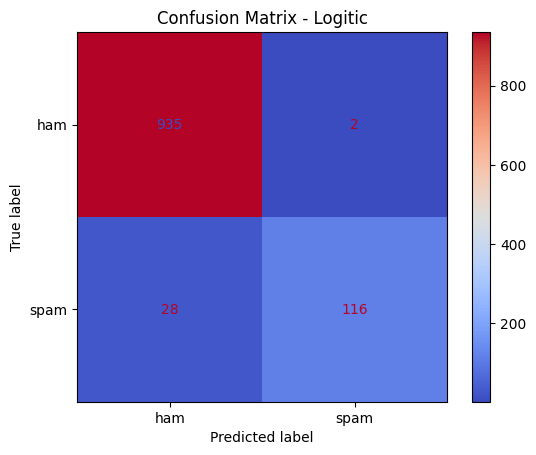


Bayer - Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       937
        spam       1.00      0.70      0.82       144

    accuracy                           0.96      1081
   macro avg       0.98      0.85      0.90      1081
weighted avg       0.96      0.96      0.96      1081



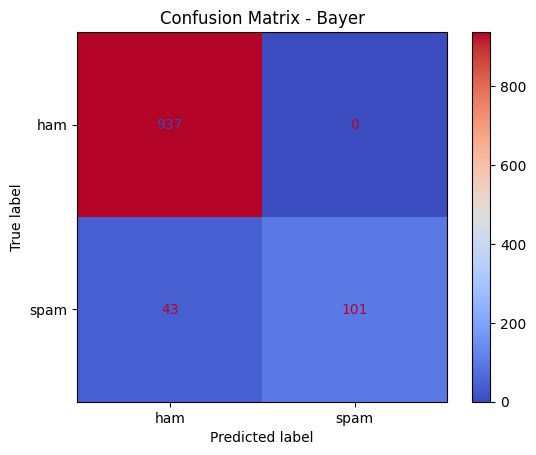


Tree - Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       937
        spam       0.92      0.85      0.89       144

    accuracy                           0.97      1081
   macro avg       0.95      0.92      0.94      1081
weighted avg       0.97      0.97      0.97      1081



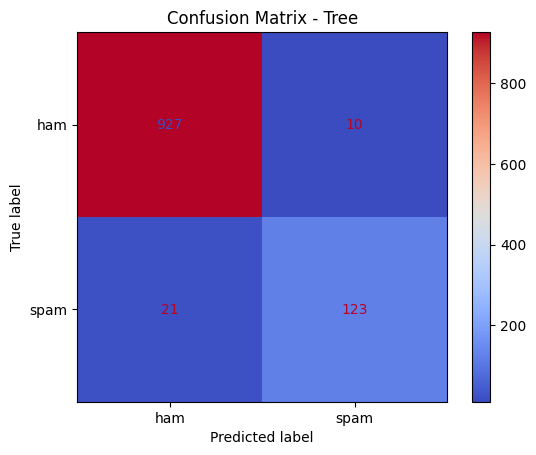


SVC - Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       937
        spam       0.99      0.93      0.96       144

    accuracy                           0.99      1081
   macro avg       0.99      0.96      0.98      1081
weighted avg       0.99      0.99      0.99      1081



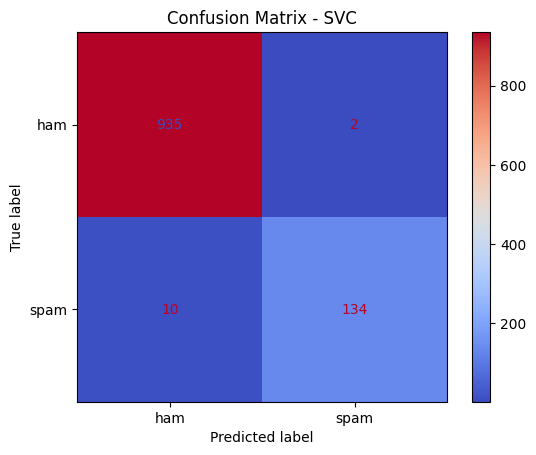

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
labels = sorted(list(set(y_test))) 

for name,model in models.items():
    model.fit(x_train_vec,y_train)
    y_pred = model.predict(x_test_vec)
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='coolwarm')  # poți schimba colormap-ul
    plt.title(f"Confusion Matrix - {name}")  # titlu pentru fiecare model
    plt.show()
 


# Cocluzii :
✔ HAM (mesaje normale)

Precision = 0.99, Recall = 1.00

Recunoaște perfect mesajele normale și aproape niciodată nu le clasifică drept spam.

✔ SPAM

Recall = 0.93 (vs 0.81 la logistic)

📌 SVC este algoritmul ales de mine pentru a deoarece mesajele ham sunt aproape in tot timpl descoperite in timp ce spam auo rata de 93% de succes.